# Attribute Information
- App: Application name
- Category: Category the app belongs to
- Rating: Overall user rating of the app
- Reviews: Number of user reviews for the app
- Size: Size of the app
- Installs: Number of user downloads/installs for the app
- Type: Paid or Free
- Price: Price of the app
- Content Rating: Age group the app is targeted at - Children / Mature 21+ / Adult
- Genres: An app can belong to multiple genres (apart from its main category). For
    - eg, a musical family game will belong to Music, Game, Family genres.
- Last Updated: Date when the app was last updated on Play Store
- Current Ver: Current version of the app available on Play Store
- Android Ver: Min required Android version


In [1]:
# Load the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn import metrics

%matplotlib inline

In [2]:
# Load the data from file
DF = pd.read_csv("Apps_data.csv")
DF.shape

(10841, 13)

In [3]:
DF.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


From this we can see, 
- App: Name of an application, so mostly do not have any value for the prediction of rating.
- Category and Genres are related. We can consider Genres as sub-category and might ignore for our model building.
- Similarly we can think of Android version and App version do not influence the rating of the app. As users give rating to an app based on the downloads, reviews, price, type etc. 
- Also last updated date does not matter for the rating of an app.

So from this, we can consider the columns for our prediction are:
- Category (as we can ignore sub-category, i.e. Genres)
- Reviews
- Size
- Installs
- Type
- Price
- Content rating

In [4]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Rating is our target column and thats numeric. Rest all columns are non-numeric, so we may need to convert type of valueable columns.
- We need to take care of columns like Size, Installs, Price etc, as these columns do not contain only numbers.
- They have letters (e.g. M, K) and signs (e.g. +, comma, $).
- So before converting them to numeric, we need to replace the extra characters with appropriate values.

In [5]:
DF.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

- Target column (Rating) has more missing values (1474 missing values).
- Type and Content Rating columns have 1 missing value each.
- Current Ver has 8 missing values.
- Android Ver has 3 missing values.

We can replace those missing values with mean or median or mode. Let's analyse further.

In [6]:
DF[DF.Rating.isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
130,Recipes and tips for losing weight,BEAUTY,NaN,35,3.1M,"10,000+",Free,0,Everyone 10+,Beauty,"December 11, 2017",2.0,3.0 and up
134,"Lady adviser (beauty, health)",BEAUTY,NaN,30,9.9M,"10,000+",Free,0,Mature 17+,Beauty,"January 24, 2018",3.0,3.0 and up
163,Anonymous caller detection,BOOKS_AND_REFERENCE,NaN,161,2.7M,"10,000+",Free,0,Everyone,Books & Reference,"July 13, 2018",1.0,2.3 and up
180,SH-02J Owner's Manual (Android 8.0),BOOKS_AND_REFERENCE,NaN,2,7.2M,"50,000+",Free,0,Everyone,Books & Reference,"June 15, 2018",3.0,6.0 and up
185,URBANO V 02 instruction manual,BOOKS_AND_REFERENCE,NaN,114,7.3M,"100,000+",Free,0,Everyone,Books & Reference,"August 7, 2015",1.1,5.1 and up


Here we can see missing Ratings are from various Categories of Apps. Lets check the distribution of dataset.

In [7]:
DF.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,9367.0,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0


We have only one numeric column: Rating, so distribution shows only Rating.

Mean for Rating is 4.19

But we can see max rating is 19. This can affect the mean and median.  
- As Google App rating, Max rating can be 5, so there is some mistake in the Rating column with value 19
- Lets check the records having rating as 19.

Once we update the wrong Rating value, then we can find the central tendencies and update the missing values.

In [8]:
# Lets see mean, median and mode for Rating
print("Rating mean:", DF.Rating.mean(), "\nRating median:", DF.Rating.median(), "\nRating mode:", DF.Rating.mode())

Rating mean: 4.193338315362448 
Rating median: 4.3 
Rating mode: 0    4.4
dtype: float64


In [9]:
DF[DF.Rating==19]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


There is only one record (row 10472) with rating value 19. We can simply drop the record, but let's see why it has wrong value(s).
- After analysing all the columns, It looks like the values for this record has been left-shifted by one column from Rating column till last. 
- As we can see from the data above (i.e. DF.head(10)), 
    - "4.0 and up" can be Android Version
    - 1.0.19 can be Current version of App
    - "February 11, 2018" can be the last updated date
    - and so on till 1.9 cannot be a Category rather it can be a Rating.
    - Based on App name "Life Made WI-Fi Touchscreen Photo Frame", seems this will belong to a category related to Photo. We can see other apps with similar names and decide based on that.
- Based on above analysis, we can update the values for this record as we have column-shifted mistake in this one record only.

In [10]:
# Lets check the suitable category for 10472 row
DF[DF.App.str.contains('photo frame', case=False)].Category.value_counts()

PHOTOGRAPHY        8
PERSONALIZATION    1
ART_AND_DESIGN     1
1.9                1
EVENTS             1
Name: Category, dtype: int64

Most of the Apps with title "photo frame" has a category called "PHOTOGRAPHY", So we can update Category as <b>PHOTOGRAPHY</b> for record 10472.

In [11]:
#DF.columns

In [12]:
# Lets update the record.
# Lets shift the values

#row = 10472
DF.at[10472,'Android Ver'] = DF.at[10472,'Current Ver']
DF.at[10472,'Current Ver'] = DF.at[10472,'Last Updated']
DF.at[10472,'Last Updated'] = DF.at[10472,'Genres']
DF.at[10472,'Genres'] = DF.at[10472,'Content Rating']
DF.at[10472,'Content Rating'] = DF.at[10472,'Price']
DF.at[10472,'Price'] = DF.at[10472,'Type']
DF.at[10472,'Type'] = DF.at[10472,'Installs']
DF.at[10472,'Installs'] = DF.at[10472,'Size']
DF.at[10472,'Size'] = DF.at[10472,'Reviews']
DF.at[10472,'Reviews'] = DF.at[10472,'Rating']
DF.at[10472,'Rating'] = DF.at[10472,'Category']
DF.at[10472,'Category'] = "PHOTOGRAPHY"

DF.iloc[10472:10473, :]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,PHOTOGRAPHY,1.9,19,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up


Record 10472 has been updated with appropriate values for its columns.

In [13]:
DF.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,9367.0,4.191513,0.515735,1.0,4.0,4.3,4.5,5.0


- Now we can see for the Apps, Min rating 1 and Max rating 5. 
- Most of the apps have 4 or more rating.

In [14]:
DF.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               1
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

We can see, after updating 10472 record 

- Now Genres has 1 missing value rather Content Rating, as we shifted Content Rating's missing value to Genres.
- And Android Ver has 2 missing values. (One missing value is filled with appropriate value)

In [15]:
# Lets see mean, median and mode for Rating
print("Rating mean:", DF.Rating.mean(), "\nRating median:", DF.Rating.median(), "\nRating mode:", DF.Rating.mode())

Rating mean: 4.1915127575531175 
Rating median: 4.3 
Rating mode: 0    4.4
dtype: float64


- As wrong Rating was there only in one record, after updating that, median is same as before and mean has slighly changed.

Also these central tendency measures will vary if we have duplicate records in our dataset.

In [16]:
#Lets check the duplicate entries
DF[DF.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
265,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
266,Zenefits,BUSINESS,4.2,296,14M,"50,000+",Free,0,Everyone,Business,"June 15, 2018",3.2.1,4.1 and up
267,Google Ads,BUSINESS,4.3,29313,20M,"5,000,000+",Free,0,Everyone,Business,"July 30, 2018",1.12.0,4.0.3 and up
268,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
269,Slack,BUSINESS,4.4,51507,Varies with device,"5,000,000+",Free,0,Everyone,Business,"August 2, 2018",Varies with device,Varies with device


We can see 483 duplicate records are there in the dataset out of 10841 records(i.e. 10358 unique records, we can verify that).
- As we have less than 5% duplicated data (483 out of 10841), we can consider dropping it. We can say data loss < 5%.

In [17]:
#Lets check total unique records, it should be 10358 (i.e. 10841-483)
DF.drop_duplicates().shape

(10358, 13)

If we drop all the duplicates, then we will have 10358 records. (> 95% data retained)
- So lets drop duplicates.

## Drop duplicate entries

In [18]:
#Lets remove the duplicate entries from the dataset.

DF_U = DF.drop_duplicates(); #DF_U for DF Unique records
DF_U.shape

(10358, 13)

In [19]:
# Lets see mean, median and mode for Rating
print("Rating mean:", DF.Rating.mean(), "\nRating median:", DF.Rating.median(), "\nRating mode:", DF.Rating.mode())
print()
print("Missing Rating count:", DF_U.Rating.isna().sum())
DF_U.describe().T

Rating mean: 4.1915127575531175 
Rating median: 4.3 
Rating mode: 0    4.4
dtype: float64

Missing Rating count: 1465


,count,mean,std,min,25%,50%,75%,max
Rating,8893.0,4.187619,0.52291,1.0,4.0,4.3,4.5,5.0


After deleting duplicates, We can see
- Mean has slighly changed, but it's always around 4.2.
- Mean is around ~4.2, median is 4.3 and mode is 4.4.
- Now we have 1465 missing Ratings. (i.e. 9 duplicate records with missing Rating)
- And 8893 records with Ratings.

As still lots of Rating values are missing, replacing it with mean/median/mode may not be safe and results will be highly biased.

So Lets not replace the missing values for Rating column.

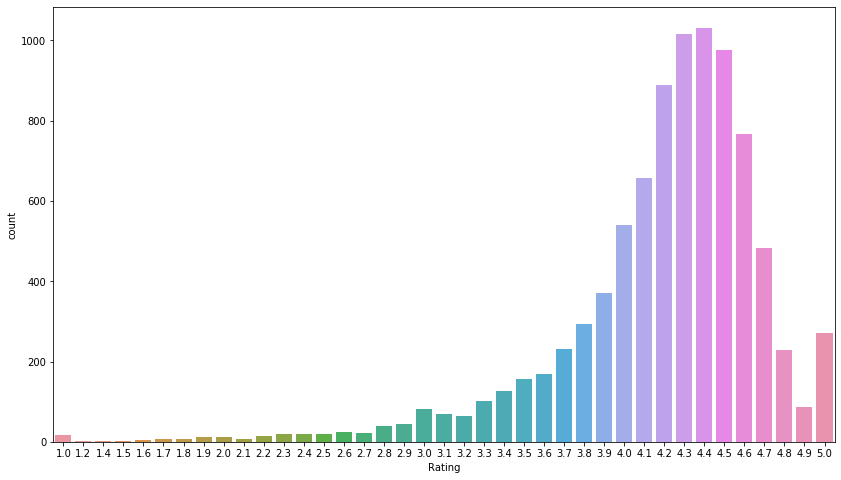

In [20]:
fig, ax = plt.subplots(figsize=(14,8))
sns.countplot(DF_U.Rating, ax=ax);

Ignoring missing values, Rating distribution looks like above, A left skewed distribution.

## Rating

In [21]:
DF_U.Rating.unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

In [22]:
# As we will consider High is >=3.5 and Low is < 3.5
print("High Ratings:", DF_U[DF_U.Rating >= 3.5].Rating.count())
print("Low Ratings:", DF_U[DF_U.Rating < 3.5].Rating.count())

High Ratings: 8169
Low Ratings: 724


As we consider High is >=3.5 and Low is < 3.5, so the actual High Ratings are 8169 and actual Low Ratings are 724.
- But when we convert to categorical, nan values will be converted to Low Rating based on the condition.

In [23]:
DF_U["Rating_Cat"] = DF_U["Rating"].apply(lambda x: "high" if x >= 3.5 else "low")

C:\Users\kishore.cs\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


As we converted to categorical column Rating_Cat, based on the condition nan values would have converted to low rating. We can verify that.

In [24]:
#Just to verify
print("Rating categories:", DF_U.Rating_Cat.unique())
DF_U.Rating_Cat.value_counts()

Rating categories: ['high' 'low']


high    8169
low     2189
Name: Rating_Cat, dtype: int64

We have 8169 Apps with high rating (i.e. >=3.5) and 2189 Apps with low rating.
- 79% are High Rating and 21% are Low rating
- So we may see a slighly biased result, biased towards _high_ rating.
- Count of High Rating Apps are almost ~3.7 times higher than Low Rating Apps.

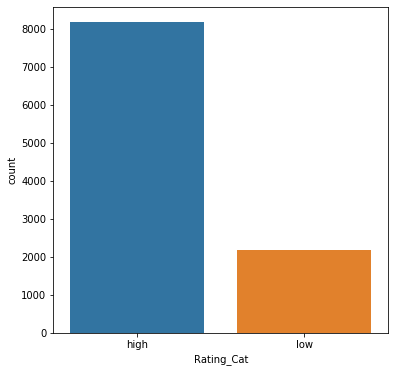

In [25]:
fig, ax = plt.subplots(figsize=(6,6))
sns.countplot(DF_U.Rating_Cat, ax=ax);

As we have filled missing values of Rating with Low category, so Low count has increased.

## Category

In [26]:
DF_U.Category.value_counts()

FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             323
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
COMICS                   60
PARENTING                60
BEAUTY                   53
Name: Category, dtype: int64

- <b>FAMILY</b> Category has the highest number of Apps.
- Second highest is GAME Category.

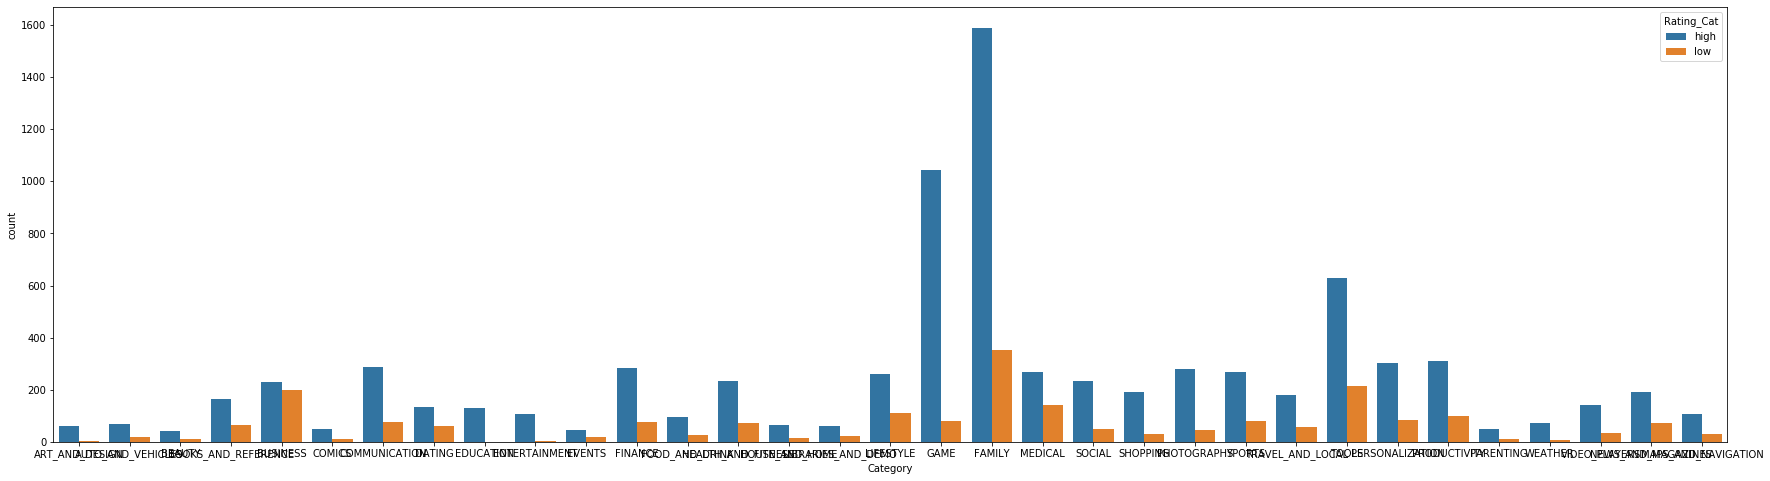

In [27]:
fig, ax = plt.subplots(figsize=(30,8))
sns.countplot(DF_U.Category, ax=ax, hue=DF_U.Rating_Cat);

- From above plot we can see Family has the highest number of apps.
- And Most of the Apps in almost all categories belong to high rating group.

## Reviews

In [28]:
DF_U.Reviews.isna().sum()

0

No NaN values (i.e. no missing values) in Reviews.

In [29]:
# As Reviews col does not have missing value, so we can directly convert it to numeric
DF_U.Reviews = pd.to_numeric(DF_U.Reviews, errors='coerce')
DF_U.Reviews.dtypes
# better to use errors as coerce as doc says: If 'coerce', then invalid parsing will be set as NaN

C:\Users\kishore.cs\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


dtype('float64')

In [30]:
# Lets check the top apps
DF_U.nlargest(15, ['Reviews'])[['App', 'Reviews', 'Category', 'Genres']]

,App,Reviews,Category,Genres
2544,Facebook,78158306.0,SOCIAL,Social
3943,Facebook,78128208.0,SOCIAL,Social
336,WhatsApp Messenger,69119316.0,COMMUNICATION,Communication
3904,WhatsApp Messenger,69109672.0,COMMUNICATION,Communication
2604,Instagram,66577446.0,SOCIAL,Social
2545,Instagram,66577313.0,SOCIAL,Social
3909,Instagram,66509917.0,SOCIAL,Social
382,Messenger – Text and Video Chat for Free,56646578.0,COMMUNICATION,Communication
335,Messenger – Text and Video Chat for Free,56642847.0,COMMUNICATION,Communication
1879,Clash of Clans,44893888.0,GAME,Strategy


As we can see from above table, Below are the Top 5 Apps with highest number of reviews:
1. Facebook (Genre: Social)
2. WhatsApp Messenger (Genre: Communication)
3. Instagram (Genre: Social)
4. Messenger – Text and Video Chat for Free (Genre: Communication)
5. Clash of Clans (Genre: Strategy)

We can see same app with different reviews count, it might be because of apps for different platforms/devices such as Mobile, Tablet, TV, Watch etc.

## Size

In [31]:
DF_U.Size.unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

- From above unique values of Size column, we can see it has M for Megabytes, k for Kilobytes.
- Also there is a size with value <b>"Varies with device"</b>, which probably we will replace with <b>NaN</b>
- <b>M</b> can be replaced with <b>10^6</b> and <b>k</b> can be replaced with <b>10^3</b>
- Just to get rid of uppercase units and lowercase units, lets convert all to lowercase, so no need to check whether <b>m</b> or <b>K</b> is present or not.

In [32]:
# Convert to lowercase
DF_U.Size = DF_U.Size.str.lower()
#DF_U.Size.unique()

#Lets convert the units and make all app size in bytes.
convert = lambda x: float(x.replace('m', ''))*1000000 if "m" in x else (float(x.replace('k', ''))*1000 if "k" in x else x)
DF_U.Size = DF_U.Size.apply(convert)

DF_U.Size.unique()

array([19000000.0, 14000000.0, 8700000.0, 25000000.0, 2800000.0,
       5600000.0, 29000000.0, 33000000.0, 3100000.0, 28000000.0,
       12000000.0, 20000000.0, 21000000.0, 37000000.0, 2700000.0,
       5500000.0, 17000000.0, 39000000.0, 31000000.0, 4200000.0,
       7000000.0, 23000000.0, 6000000.0, 6100000.0, 4600000.0, 9200000.0,
       5200000.0, 11000000.0, 24000000.0, 'varies with device', 9400000.0,
       15000000.0, 10000000.0, 1200000.0, 26000000.0, 8000000.0,
       7900000.0, 56000000.0, 57000000.0, 35000000.0, 54000000.0,
       201000.0, 3600000.0, 5700000.0, 8600000.0, 2400000.0, 27000000.0,
       2500000.0, 16000000.0, 3400000.0, 8900000.0, 3900000.0, 2900000.0,
       38000000.0, 32000000.0, 5400000.0, 18000000.0, 1100000.0,
       2200000.0, 4500000.0, 9800000.0, 52000000.0, 9000000.0, 6700000.0,
       30000000.0, 2600000.0, 7100000.0, 3700000.0, 22000000.0, 7400000.0,
       6400000.0, 3200000.0, 8199999.999999999, 9900000.0, 4900000.0,
       9500000.0, 5000000.0,

Now as all the sizes are in bytes, lets fill the missing values. 

In [33]:
print("Number of other value", DF_U.Size[DF_U.Size == 'varies with device'].shape)
#DF_U.Size.replace({"Varies with device": np.nan}, inplace=True)
DF_U.Size = pd.to_numeric(DF_U.Size, errors='coerce')

Number of other value (1526,)


- We have 1526 Apps with size value "Varies with device".
- As now we have converted to numeric datatype, so those 1526 values will become NaN. Lets see that.

In [34]:
print("Type of Size col:", DF_U.Size.dtypes)
DF_U.Size.unique()

Type of Size col: float64


array([1.90e+07, 1.40e+07, 8.70e+06, 2.50e+07, 2.80e+06, 5.60e+06,
       2.90e+07, 3.30e+07, 3.10e+06, 2.80e+07, 1.20e+07, 2.00e+07,
       2.10e+07, 3.70e+07, 2.70e+06, 5.50e+06, 1.70e+07, 3.90e+07,
       3.10e+07, 4.20e+06, 7.00e+06, 2.30e+07, 6.00e+06, 6.10e+06,
       4.60e+06, 9.20e+06, 5.20e+06, 1.10e+07, 2.40e+07,      nan,
       9.40e+06, 1.50e+07, 1.00e+07, 1.20e+06, 2.60e+07, 8.00e+06,
       7.90e+06, 5.60e+07, 5.70e+07, 3.50e+07, 5.40e+07, 2.01e+05,
       3.60e+06, 5.70e+06, 8.60e+06, 2.40e+06, 2.70e+07, 2.50e+06,
       1.60e+07, 3.40e+06, 8.90e+06, 3.90e+06, 2.90e+06, 3.80e+07,
       3.20e+07, 5.40e+06, 1.80e+07, 1.10e+06, 2.20e+06, 4.50e+06,
       9.80e+06, 5.20e+07, 9.00e+06, 6.70e+06, 3.00e+07, 2.60e+06,
       7.10e+06, 3.70e+06, 2.20e+07, 7.40e+06, 6.40e+06, 3.20e+06,
       8.20e+06, 9.90e+06, 4.90e+06, 9.50e+06, 5.00e+06, 5.90e+06,
       1.30e+07, 7.30e+07, 6.80e+06, 3.50e+06, 4.00e+06, 2.30e+06,
       7.20e+06, 2.10e+06, 4.20e+07, 7.30e+06, 9.10e+06, 5.50e

- We can see "Varies with device" has been converted to nan.
- And datatype of Size column is float64.

Now Lets replace nan values with mean or median or mode.

In [35]:
print("Total missing values in Size:", DF_U.Size.isna().sum())
print("Mean:",DF_U.Size.mean(), "\nMedian:",DF_U.Size.median(), "\nMode:", DF_U.Size.mode())

Total missing values in Size: 1526
Mean: 21285717.67436594 
Median: 13000000.0 
Mode: 0    11000000.0
dtype: float64


Lets take the avg size of the app for the missing values.

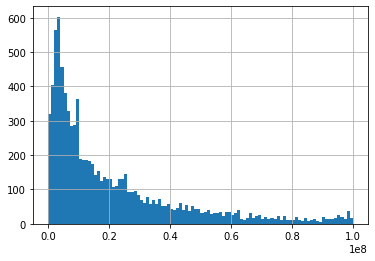

In [36]:
DF_U.Size.hist(bins=100)

Before filling missing values, we can see the distribution of Size column.

In [37]:
DF_U.Size.fillna(DF_U.Size.mean(), inplace=True)

C:\Users\kishore.cs\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


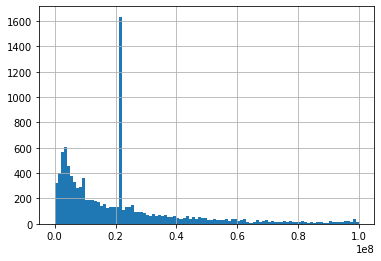

In [38]:
DF_U.Size.hist(bins=100)

As we filled with average value of app size, we can see in the distribution, number of that particular app size has gone high.

## Installs

In [39]:
DF_U.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

Installs column has comma and +. Lets remove those charatcters and convert to numeric.

In [40]:
# Replace extra characters (+ and ,)
DF_U.Installs = DF_U.Installs.str.replace('+', '')
DF_U.Installs = DF_U.Installs.str.replace(',', '')

# Convert to numeric
DF_U.Installs = pd.to_numeric(DF_U.Installs, errors='coerce')

DF_U.Installs.unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0],
      dtype=int64)

Now Installs col is numeric and int64 type.

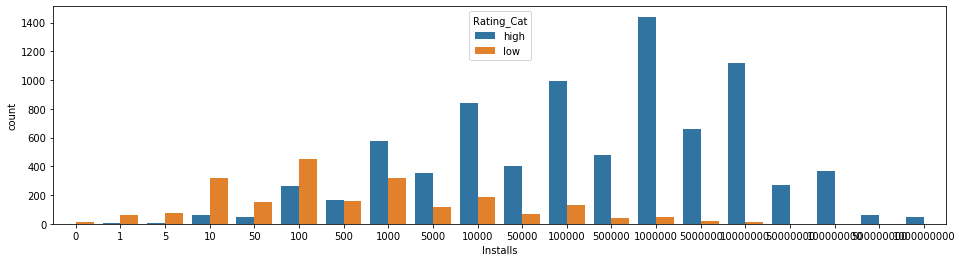

In [41]:
fig, ax = plt.subplots(figsize=(16,4))
sns.countplot(DF_U.Installs, ax=ax, hue=DF_U.Rating_Cat);

We can see Apps with less number of installs have more Low Rating.

In [42]:
#DF_U.groupby(DF_U.Installs).count()
DF_U.Installs.value_counts()

1000000       1488
10000000      1132
100000        1129
10000         1033
1000           891
100            710
5000000        683
500000         517
50000          474
5000           469
10             385
100000000      369
500            328
50000000       272
50             204
5               82
1               67
500000000       61
1000000000      49
0               15
Name: Installs, dtype: int64

Here we can number of apps and their download/install count.
- e.g. 1488 Apps has 10Laks downloads, 1132 Apps has 1Cr downloads and so on.

## Type 

In [43]:
print("Number of missing values:", DF_U.Type.isna().sum())
print(DF_U.Type.unique())

Number of missing values: 1
['Free' 'Paid' nan]


We have 1 missing value in Type column.
- Lets check the price for the record, so based on price we can decide whether its free app or paid app. 

In [44]:
DF_U[DF_U.Type.isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_Cat
9148,Command & Conquer: Rivals,FAMILY,NaN,0.0,2.128572e+07,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device,low


As price is 0, we can make it _Free_ app

In [45]:
DF_U.Type.fillna('Free', inplace=True)
print(DF_U.Type.unique())

['Free' 'Paid']


Now no missing values in Type column.

In [46]:
DF_U.Type.value_counts()

Free    9593
Paid     765
Name: Type, dtype: int64

- We have 9593 Free apps and 765 paid apps.
- Thats <b>~7.386%</b> Paid apps

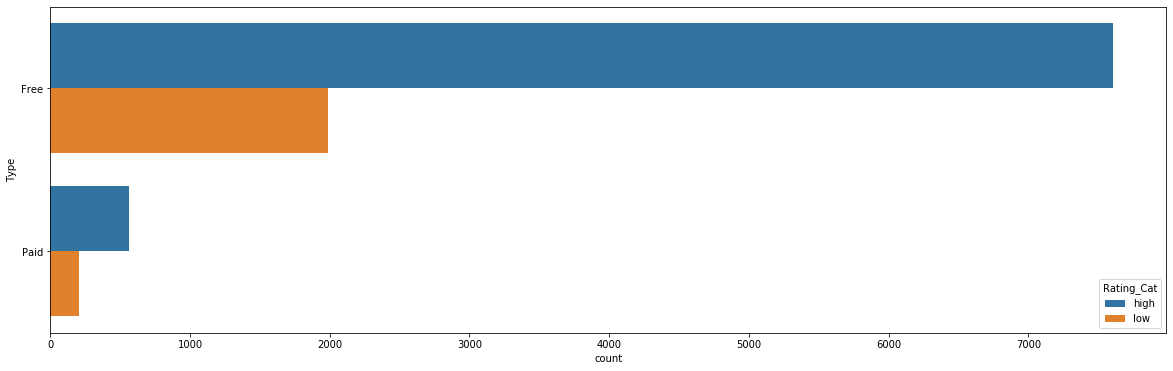

In [47]:
fig, ax = plt.subplots(figsize=(20,6))
sns.countplot(y=DF_U.Type, ax=ax, hue=DF_U.Rating_Cat);

- From above plot we can see Most of the apps in our dataset are free apps and among them most of them belog to high rating group.
- This shows our dataset is not balanced.

## Price

In [48]:
DF_U.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

We have \\$ sign in Price values. Lets remove the \\$ sign.

In [49]:
#Replace $ with blank
DF_U.Price = DF_U.Price.str.replace('$', '')

#Convert to numeric
DF_U.Price = pd.to_numeric(DF_U.Price, errors='coerce')

DF_U.Price.unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [50]:
#Most expensive App and its price.
DF_U[DF_U.Price == DF_U.Price.max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_Cat
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275.0,7300000.0,10000,Paid,400.0,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up,high


The most expensive app is <b>"I'm Rich - Trump Edition"</b> and its price is <b>$400</b>.

In [51]:
DF_U.groupby(DF_U['Content Rating']).count()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Genres,Last Updated,Current Ver,Android Ver,Rating_Cat
Content Rating,,,,,,,,,,,,,
Adults only 18+,3,3,3,3,3,3,3,3,3,3,3,3,3
Everyone,8383,8383,7096,8383,8383,8383,8383,8383,8382,8383,8375,8381,8383
Everyone 10+,377,377,360,377,377,377,377,377,377,377,377,377,377
Mature 17+,447,447,411,447,447,447,447,447,447,447,447,447,447
Teen,1146,1146,1022,1146,1146,1146,1146,1146,1146,1146,1146,1146,1146
Unrated,2,2,1,2,2,2,2,2,2,2,2,2,2


We might have considered _Content Rating_ column for our prediction. But as given in problem statement, we will ignore as of now.

In [52]:
DF_U.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 0 to 10840
Data columns (total 14 columns):
App               10358 non-null object
Category          10358 non-null object
Rating            8893 non-null float64
Reviews           10358 non-null float64
Size              10358 non-null float64
Installs          10358 non-null int64
Type              10358 non-null object
Price             10358 non-null float64
Content Rating    10358 non-null object
Genres            10357 non-null object
Last Updated      10358 non-null object
Current Ver       10350 non-null object
Android Ver       10356 non-null object
Rating_Cat        10358 non-null object
dtypes: float64(4), int64(1), object(9)
memory usage: 1.5+ MB


- Now we have numeric columns such as Reviews, Size, Installs, Price. (we will ignore Rating as we have Rating_Cat)
- And we have Categorical columns such as Category, Type and Rating_Cat.
- Other categorical columns, we will ignore as those are not useful for prediction. 

## Drop columns

In [53]:
# Lets drop extra columns

DF_UN = DF_U.drop(['App', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver', 'Rating'], axis=1)
DF_UN.head()

,Category,Reviews,Size,Installs,Type,Price,Rating_Cat
0,ART_AND_DESIGN,159.0,19000000.0,10000,Free,0.0,high
1,ART_AND_DESIGN,967.0,14000000.0,500000,Free,0.0,high
2,ART_AND_DESIGN,87510.0,8700000.0,5000000,Free,0.0,high
3,ART_AND_DESIGN,215644.0,25000000.0,50000000,Free,0.0,high
4,ART_AND_DESIGN,967.0,2800000.0,100000,Free,0.0,high


In [54]:
DF_UN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 0 to 10840
Data columns (total 7 columns):
Category      10358 non-null object
Reviews       10358 non-null float64
Size          10358 non-null float64
Installs      10358 non-null int64
Type          10358 non-null object
Price         10358 non-null float64
Rating_Cat    10358 non-null object
dtypes: float64(3), int64(1), object(3)
memory usage: 967.4+ KB


We have 3 categorical columns. Lets encode those.

In [55]:
DF_UN.isna().sum()

Category      0
Reviews       0
Size          0
Installs      0
Type          0
Price         0
Rating_Cat    0
dtype: int64

No missing values in any column.

In [56]:
print("Target:",DF_UN.Rating_Cat.unique())
print()
print("Unique Types:",DF_UN.Type.unique())
print()
print("Unique categories:",DF_UN.Category.unique())
print()
print("Total unique categories:", len(DF_UN.Category.unique()))

Target: ['high' 'low']

Unique Types: ['Free' 'Paid']

Unique categories: ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']

Total unique categories: 33


We have 
- 2 classes to predict, i.e. high and low, we can make it 1 and 0 respectively.
- 2 Types of Apps, we can one-hot encode them.
- 33 categories, we will encode them with one-hot encoding.

## Encoding

In [57]:
#Lets encode Type column
DF_UNE = pd.get_dummies(DF_UN, columns=['Type'], drop_first=True)
DF_UNE.head()

,Category,Reviews,Size,Installs,Price,Rating_Cat,Type_Paid
0,ART_AND_DESIGN,159.0,19000000.0,10000,0.0,high,0
1,ART_AND_DESIGN,967.0,14000000.0,500000,0.0,high,0
2,ART_AND_DESIGN,87510.0,8700000.0,5000000,0.0,high,0
3,ART_AND_DESIGN,215644.0,25000000.0,50000000,0.0,high,0
4,ART_AND_DESIGN,967.0,2800000.0,100000,0.0,high,0


After encoding Type, it created Type_Paid column.

In [58]:
#Lets encode Category column
DF_UNE = pd.get_dummies(DF_UNE, columns=['Category'], drop_first=True)
DF_UNE.head()

,Reviews,Size,Installs,Price,Rating_Cat,Type_Paid,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,159.0,19000000.0,10000,0.0,high,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,967.0,14000000.0,500000,0.0,high,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,87510.0,8700000.0,5000000,0.0,high,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,215644.0,25000000.0,50000000,0.0,high,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,967.0,2800000.0,100000,0.0,high,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


After encoding Category, it created columns for all Categories (except first category).

In [59]:
# Lets encode Target column
# We can one-hot encode Rating_Cat column as well, 
# but in that case the column name will be changed to Rating_Cat_high or Rating_Cat_low.

#So to keep the rating column name as it is, we can encode manually. 
#OR we can use get_dummies and change column name later.

#Lets apply one-hot encoding
DF_UNER = pd.get_dummies(DF_UNE, columns=['Rating_Cat'], drop_first=True)
DF_UNER.head()

,Reviews,Size,Installs,Price,Type_Paid,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Rating_Cat_low
0,159.0,19000000.0,10000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,967.0,14000000.0,500000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,87510.0,8700000.0,5000000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,215644.0,25000000.0,50000000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,967.0,2800000.0,100000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- New target column Rating_Cat_low has been created.
- 0 means high rating and 1 means low rating.

In [60]:
DF_UNER[['Reviews', 'Size', 'Installs', 'Price']].describe().T

,count,mean,std,min,25%,50%,75%,max
Reviews,10358.0,4.058654e+05,2.696651e+06,0.0,32.0,1678.5,46404.25,7.815831e+07
Size,10358.0,2.128572e+07,2.081317e+07,8500.0,5700000.0,17000000.0,26000000.00,1.000000e+08
Installs,10358.0,1.415639e+07,8.023580e+07,0.0,1000.0,100000.0,1000000.00,1.000000e+09
Price,10358.0,1.030701e+00,1.627784e+01,0.0,0.0,0.0,0.00,4.000000e+02


- We can see columns have different range of values 
- And also in each column, values vary a lot.

As Decision Tree and Ensemble techniques are not sensitive to the variance in the data, so we will not scale the data.

In [61]:
# Lets check the distribution of Ratings
#DF_UNER.Rating_Cat_low.hist()
#sns.countplot(DF_UNER.Rating_Cat_low, hue=DF_UNER.Type_Paid);

## Split the data

In [62]:
#Lets separate the independent variables and dependent variable
X = DF_UNER.drop(['Rating_Cat_low'], axis=1)
y = pd.DataFrame(DF_UNER['Rating_Cat_low'], columns=['Rating_Cat_low'])
print(X.shape, y.shape)

(10358, 37) (10358, 1)


Now we have 37 features with 1 target.

In [63]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7250, 37), (3108, 37), (7250, 1), (3108, 1))

In [64]:
X_train.shape[0]/X.shape[0], X_test.shape[0]/X.shape[0] 

(0.699942073759413, 0.30005792624058697)

70-30 split for train and test respectively.

In [65]:
y_test.Rating_Cat_low.value_counts()

0    2491
1     617
Name: Rating_Cat_low, dtype: int64

Test set has 2491 High Ratings and 617 Low Ratings.

# Lets build models

In [66]:
def showCM(model, X_test, y_test) :
    y_pred = model.predict(X_test)
    cm = metrics.confusion_matrix(y_test, y_pred, labels=[0, 1])

    df_cm = pd.DataFrame(cm, index = [i for i in ["High","Low"]],
                  columns = [i for i in ["High","Low"]])
    plt.figure(figsize = (7,5))
    #plt.xlabel('Predicted')
    #plt.ylabel('Actual')
    sns.heatmap(df_cm, annot=True ,fmt='g');
    
    
    cr = metrics.classification_report(y_test, y_pred)
    print(cr)
    
    if not isinstance(model, StackingClassifier) :
        DF_IMP = pd.DataFrame(model.feature_importances_, columns = ["Imp"], index = X_test.columns)
        return DF_IMP[DF_IMP.Imp > 0].sort_values(by=['Imp'], ascending=False).T

## Decision Tree

In [67]:
DT_model = DecisionTreeClassifier(random_state=7)
DT_model.fit(X_train, y_train)

print("Training Accuracy:", DT_model.score(X_train, y_train))
print("Testing Accuracy", DT_model.score(X_test, y_test))

Training Accuracy: 0.9997241379310344
Testing Accuracy 0.8278635778635779


Classification report, Important features and Confusion Matrix(as heatmap) for Decision Tree

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      2491
           1       0.56      0.60      0.58       617

    accuracy                           0.83      3108
   macro avg       0.73      0.74      0.74      3108
weighted avg       0.83      0.83      0.83      3108



,Reviews,Size,Installs,Category_FAMILY,Price,Category_BUSINESS,Category_MEDICAL,Category_LIFESTYLE,Category_SPORTS,Category_VIDEO_PLAYERS,...,Category_SHOPPING,Category_BOOKS_AND_REFERENCE,Category_BEAUTY,Category_EVENTS,Category_AUTO_AND_VEHICLES,Category_COMICS,Category_PARENTING,Category_HOUSE_AND_HOME,Category_WEATHER,Category_ENTERTAINMENT
Imp,0.602011,0.190096,0.055433,0.011357,0.011303,0.01051,0.007418,0.006814,0.00662,0.00591,...,0.003297,0.002564,0.002401,0.002063,0.001454,0.00144,0.001309,0.00093,0.000798,0.000644


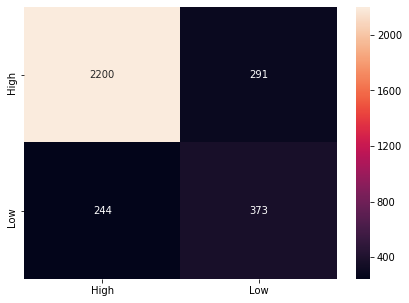

In [68]:
print("Classification report, Important features and Confusion Matrix(as heatmap) for Decision Tree")
print()
showCM(DT_model, X_test, y_test)

- Full grown tree gives training accuracy of ~1, but testing accuracy of 83%. (i.e. Overfit model)
- It shows important features are <b>Reviews, Size, Installs, Price and few categories</b>.
- F1 score is 89% and 58% for High and Low respectively.

## Regularization - DT

In [69]:
DTR_model = DecisionTreeClassifier(max_depth=7, random_state=7)
DTR_model.fit(X_train, y_train)

print("Training Accuracy", DTR_model.score(X_train, y_train))
print("Testing Accuracy", DTR_model.score(X_test, y_test))

Training Accuracy 0.8875862068965518
Testing Accuracy 0.8777348777348777


Classification report, Important features and Confusion Matrix(as heatmap) for Regularized Decision Tree

              precision    recall  f1-score   support

           0       0.90      0.95      0.93      2491
           1       0.75      0.57      0.65       617

    accuracy                           0.88      3108
   macro avg       0.83      0.76      0.79      3108
weighted avg       0.87      0.88      0.87      3108



,Reviews,Size,Installs,Price,Category_TRAVEL_AND_LOCAL,Category_LIFESTYLE,Category_PHOTOGRAPHY,Category_NEWS_AND_MAGAZINES,Category_SPORTS,Category_VIDEO_PLAYERS,Category_DATING,Category_PRODUCTIVITY,Category_HEALTH_AND_FITNESS,Category_COMICS,Category_FOOD_AND_DRINK,Category_SHOPPING,Category_BUSINESS,Category_BEAUTY,Category_COMMUNICATION,Category_GAME
Imp,0.897146,0.045098,0.010583,0.008567,0.005507,0.004646,0.004386,0.004352,0.003003,0.002662,0.001975,0.001876,0.001701,0.00169,0.001645,0.001371,0.00137,0.00099,0.00096,0.000475


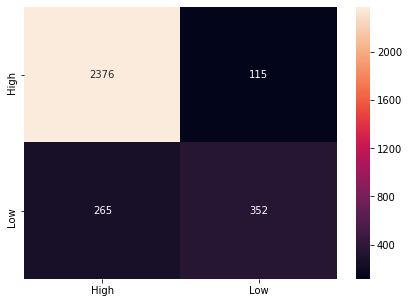

In [70]:
print("Classification report, Important features and Confusion Matrix(as heatmap) for Regularized Decision Tree")
print()
showCM(DTR_model, X_test, y_test)

- Regularized tree gives model accuracy of 88%, better than non-regularized decision tree.
- It shows important features are <b>Reviews, Installs, Size, Type, few categories and Price</b>.
- F1 score is 93% and 65% for High and Low respectively.

## Random Forest

In [71]:
RF_model = RandomForestClassifier(n_estimators=10, random_state=7)
RF_model = RF_model.fit(X_train, y_train.Rating_Cat_low)

print("Training Accuracy", RF_model.score(X_train, y_train))
print("Testing Accuracy", RF_model.score(X_test, y_test))

Training Accuracy 0.9846896551724138
Testing Accuracy 0.8732303732303732


Classification report, Important features and Confusion Matrix(as heatmap) for Random Forest

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      2491
           1       0.74      0.56      0.64       617

    accuracy                           0.87      3108
   macro avg       0.82      0.75      0.78      3108
weighted avg       0.87      0.87      0.87      3108



,Reviews,Size,Installs,Price,Category_FAMILY,Category_GAME,Category_TOOLS,Category_LIFESTYLE,Category_MEDICAL,Category_BUSINESS,...,Category_FOOD_AND_DRINK,Category_SHOPPING,Category_COMICS,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_PARENTING,Category_EDUCATION,Category_WEATHER,Category_HOUSE_AND_HOME,Category_ENTERTAINMENT
Imp,0.433568,0.209413,0.206956,0.012976,0.01026,0.008924,0.008013,0.007053,0.006891,0.005675,...,0.00294,0.002748,0.002493,0.00232,0.001969,0.001723,0.001338,0.001208,0.000896,0.000483


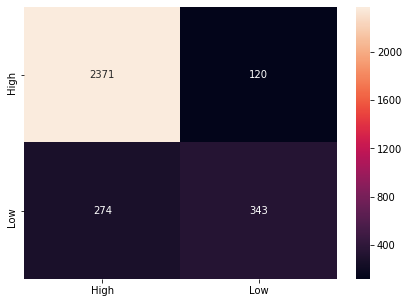

In [72]:
print("Classification report, Important features and Confusion Matrix(as heatmap) for Random Forest")
print()
showCM(RF_model, X_test, y_test)

- Random Forest gives model accuracy of 87%, with Training accuracy of 98%.
- It shows important features are <b>Reviews, Size, Installs, Price and few categories</b>.
- F1 score is 92% and 64% for High and Low respectively.

## Gradient Boosting

In [73]:
GB_model = GradientBoostingClassifier(n_estimators=50, random_state=7)#, max_depth=7, learning_rate=0.05
GB_model = GB_model.fit(X_train, y_train.Rating_Cat_low)

print("Training Accuracy", GB_model.score(X_train, y_train))
print("Testing Accuracy", GB_model.score(X_test, y_test))

Training Accuracy 0.8761379310344828
Testing Accuracy 0.888030888030888


Classification report, Important features and Confusion Matrix(as heatmap) for Gradient Boost

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      2491
           1       0.82      0.55      0.66       617

    accuracy                           0.89      3108
   macro avg       0.86      0.76      0.80      3108
weighted avg       0.88      0.89      0.88      3108



,Reviews,Size,Installs,Category_MEDICAL,Category_FAMILY,Price,Type_Paid,Category_LIFESTYLE,Category_SPORTS,Category_PERSONALIZATION,...,Category_TOOLS,Category_BEAUTY,Category_TRAVEL_AND_LOCAL,Category_DATING,Category_VIDEO_PLAYERS,Category_PARENTING,Category_PHOTOGRAPHY,Category_COMICS,Category_HEALTH_AND_FITNESS,Category_FOOD_AND_DRINK
Imp,0.953617,0.016071,0.006139,0.004956,0.004598,0.003566,0.0019,0.001706,0.001619,0.001191,...,0.000731,0.00053,0.00037,0.00036,0.000354,0.000331,0.000289,0.000281,0.000263,0.000061


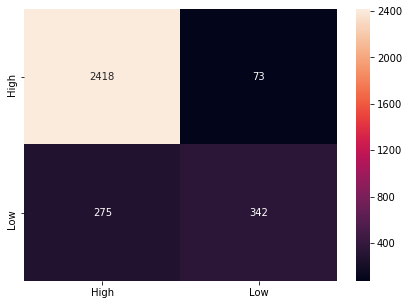

In [74]:
print("Classification report, Important features and Confusion Matrix(as heatmap) for Gradient Boost")
print()
showCM(GB_model, X_test, y_test)

- Gradient Boost gives model accuracy of 89%, with Training accuracy of 88%.
- It shows important features are <b>Reviews, Size, Installs, Price and few categories</b>.
- F1 score is 93% and 66% for High and Low respectively.

## Stacking

In [75]:
estimators = [
    ('dt', DTR_model),
    ('rf', RF_model),
    ('gb', GB_model)
]

STACK_model = StackingClassifier(estimators=estimators)
STACK_model = STACK_model.fit(X_train, y_train)

print("Training Accuracy", STACK_model.score(X_train, y_train))
print("Testing Accuracy", STACK_model.score(X_test, y_test))

C:\Users\kishore.cs\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Training Accuracy 0.9002758620689655
Testing Accuracy 0.8877091377091377


Classification report and Confusion Matrix(as heatmap) for Stacking

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      2491
           1       0.81      0.57      0.67       617

    accuracy                           0.89      3108
   macro avg       0.86      0.77      0.80      3108
weighted avg       0.88      0.89      0.88      3108



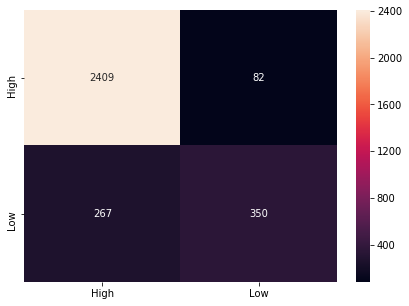

In [76]:
print("Classification report and Confusion Matrix(as heatmap) for Stacking")
print()
showCM(STACK_model, X_test, y_test)

- Stacking of all 3 models gives model accuracy of 89%.
- F1 score is 93% and 67% for High and Low respectively.

From above analysis and model building, we can see:
- Gradient Boost and Stacking gave us better performance compared to other models.
- Important features to make a highly rated mobile app are:
    - Reviews
    - Size
    - Installs
    - Price
    - Also few categories such as Family, Health and fitness, Tools, Dating, Photography, etc.

==========================================================

# Stacking with different set of models

In [77]:
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [78]:
def train_model(m, X_train, X_test, y_train, y_test):
    if m == 'lreg':
        name = 'Logistic Regression'
        model = LogisticRegression(solver='lbfgs')
    elif m == 'knn':
        name = 'KNN'
        model = KNeighborsClassifier(n_neighbors=3, weights='distance')
    elif m == 'nb':
        name = 'Gaussian Naive Bayes'
        model = GaussianNB()
    elif m == 'svm':
        name = "SVM"
        model = svm.SVC(gamma=0.025, C=9)
    
    model.fit(X_train, y_train['Rating_Cat_low'])

    score_train = model.score(X_train, y_train)
    print("Train score for", name, ":", score_train)
 
    return model #(name, acc, rec, pre, specificity, f1)

In [79]:
# Lets normalize the data
scaler = StandardScaler();
scaler.fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
X_train_scaled.shape, X_test_scaled.shape

((7250, 37), (3108, 37))

In [80]:
# Lets train various models with our data.
logreg = train_model('lreg', X_train_scaled, X_test_scaled, y_train, y_test)
knn = train_model('knn', X_train_scaled, X_test_scaled, y_train, y_test)
nb = train_model('nb', X_train_scaled, X_test_scaled, y_train, y_test)
svmm = train_model('svm', X_train_scaled, X_test_scaled, y_train, y_test)

Train score for Logistic Regression : 0.7855172413793103
Train score for KNN : 0.9997241379310344
Train score for Gaussian Naive Bayes : 0.5135172413793103
Train score for SVM : 0.786896551724138


In [81]:
estimators2 = [
    ('lg', logreg),
    ('knn', knn),
    ('svmm', svmm)
]

In [82]:
STACK_model = StackingClassifier(estimators=estimators2)
STACK_model = STACK_model.fit(X_train_scaled, y_train)

print("Training Accuracy", STACK_model.score(X_train_scaled, y_train))
print("Testing Accuracy", STACK_model.score(X_test_scaled, y_test))

C:\Users\kishore.cs\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Training Accuracy 0.8851034482758621
Testing Accuracy 0.8027670527670527


Stacking of models like Logistic Regresion, KNN, SVC gave ~80% accuracy.

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2491
           1       0.51      0.19      0.27       617

    accuracy                           0.80      3108
   macro avg       0.67      0.57      0.58      3108
weighted avg       0.76      0.80      0.76      3108



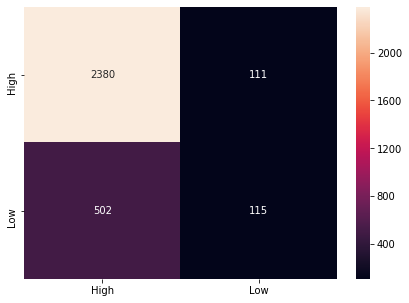

In [83]:
showCM(STACK_model, X_test_scaled, y_test)